# HW1 Notebook
#### This assignment will introduce you with the Intel DevCloud and with OpenMP basic directives and concepts of parallel computing as part of the OpenMP Common Core. 

#### Use this notebook to compile your files, submit your jobs to Intel DevCloud nodes and observe/analyze your results.
## Submittion instructions
- #### Publication Date: 10/11.
- #### Submission Date: 4/12.
- #### Submittion in groups of up to 2 students (individually or in pairs). 
- #### Submittion on the course website, in zip format including this directory with the relevant output, specifically: 
  - the source files.
  - this notebook (run_hw1.ipynb) after executing all the cells. 
  - output files of queued jobs that might be created during the execution. 
 

### Fill the name and ID of the submitters:
#### Student Name: Manor Zvi Stdudent ID: 204030720
**Note:** If you submit in pairs, it is sufficient that only single student submit the assaignment on the course website. \
Remove one line if submitted individually, or keep it empty.

## the Portable Batch System (PBS) on Intel DevCloud

Portable Batch System (PBS) is the scheduler that is used on Intel DevCloud to submit jobs on the cluster. \
The next material may help you manage your work on the cloud:
- **Quick tutorial for PBS:** https://albertsk.files.wordpress.com/2011/12/pbs.pdf.
- **Intel DevCloud Job Submission:** https://devcloud.intel.com/oneapi/documentation/job-submission.
- **Intel DevCloud Queue Management:** https://devcloud.intel.com/oneapi/documentation/advanced-queue.

## Problem 1: Know Your Hardware (10 points)
### In this section we will get familiar with Intel DevCloud nodes, and learn how to simply submit a job via the PBS scheduler. 
- The _pbsnodes_ command is used to find out the architectures and features of the compute nodes available to you. The actual output of pbsnodes may be very long if your share of the Intel® DevCloud includes a lot of compute nodes, so you may need to pipe the output. Specifically, it might be interesting to get the list of all the different properties and the number of nodes associated with the property by running the following command:

In [22]:
! pbsnodes | grep "properties =" | awk '{print $3}' | sort | uniq -c

     22 core,tgl,i9-11900kb,ram32gb,netgbe,gpu,gen11
     78 xeon,cfl,e-2176g,ram64gb,net1gbe,gpu,gen9
      4 xeon,clx,ram192gb,net1gbe,batch,extended,fpga,stratix10,fpga_runtime
      6 xeon,icx,gold6348,ramgb,netgbe,jupyter,batch
      7 xeon,icx,plat8380,ram2tb,net1gbe,batch
      3 xeon,skl,gold6128,ram192gb,net1gbe,fpga_runtime,fpga,agilex
     12 xeon,skl,gold6128,ram192gb,net1gbe,fpga_runtime,fpga,arria10
     79 xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch
     26 xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch,fpga_compile
     12 xeon,skl,ram384gb,net1gbe,renderkit
      4 xeon,spr,max9480,ram256gb,netgbe,batch,hbm
      1 xeon,spr,plat8480,ram512gb,netgbe,dual_gpu,hbm2e,gpu,max,max_1100
      2 xeon,spr,ram1024gb,netgbe,dnp50


- The next script is used to print basic hardware specifications of a compute node. Run the next cell to print the content of the script.

In [23]:
#print content of check_specifications.sh
%pycat check_specifications.sh

#!/bin/bash
/bin/echo "##" $(whoami) is checking specifications of a standard CPU Intel DevCloud node
echo "########################################### lscpu:"
lscpu
echo "########################################### cat /proc/cpuinfo:"
cat /proc/cpuinfo
echo "########################################### cat /proc/meminfo:"
cat /proc/meminfo
echo "########################################### numactl --hardware"
numactl --hardware
exit


- We now submit the script to the Intel Dev Cloud using the _qsub_ command of PBS. 
When not providing any other parameters, this command allocates the first available node on the cluster for this job. For the next sections of this assignment, we only work with CPU threads (we do not need any further properties like GPU), so for now any node will be fine. Run the following cell. The output will be created in the current directory. Watch it.

In [24]:
#Alloc a CPU compute node and see its specifications
! chmod 755 check_specifications.sh;
! qsub check_specifications.sh

2518271.v-qsvr-1.aidevcloud


In [25]:
! qsub run_getconf.sh

2518272.v-qsvr-1.aidevcloud


In [26]:
! cd ~/dev/HW1/HW1 && cat check_specifications.sh.o* | grep -E "Model name|Socket\(s\)|Core\(s\)|NUMA node\(s\)|Thread\(s\) per core|L1d cache|L1i cache|L2 cache|L3 cache|processor|cache size"

Thread(s) per core:              2
Core(s) per socket:              6
Socket(s):                       2
NUMA node(s):                    2
Model name:                      Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz
L1d cache:                       384 KiB
L1i cache:                       384 KiB
L2 cache:                        12 MiB
L3 cache:                        38.5 MiB
processor	: 0
cache size	: 19712 KB
processor	: 1
cache size	: 19712 KB
processor	: 2
cache size	: 19712 KB
processor	: 3
cache size	: 19712 KB
processor	: 4
cache size	: 19712 KB
processor	: 5
cache size	: 19712 KB
processor	: 6
cache size	: 19712 KB
processor	: 7
cache size	: 19712 KB
processor	: 8
cache size	: 19712 KB
processor	: 9
cache size	: 19712 KB
processor	: 10
cache size	: 19712 KB
processor	: 11
cache size	: 19712 KB
processor	: 12
cache size	: 19712 KB
processor	: 13
cache size	: 19712 KB
processor	: 14
cache size	: 19712 KB
processor	: 15
cache size	: 19712 KB
processor	: 16
cache size	: 19712 KB
pro

##### Explain what do you learn from the specs. Focus on:
- How many CPU sockets there are in the node?
2
- How many physical cores for each CPU socket?
6
- How many Non-Uniform Memory Access (NUMA) nodes in the system? What does it mean? 
2 - these are the mems of each processor -> hence 2
- What does it mean "Thread(s) per core"? (Hint: check in google for "_Hyper-Threading_").
physical threads in each core, there are 2, since there are 2 threads per core, 6 cores per socket and 2 sockets, we get 24 "processors" which is actually referring to internal processing units.
- What are the cache sizes in the system? 

* This node has two sockets, which means two CPUs on the same board, as can be seen when using *lscpu*, and grepping for: "Socket(s)."
* EACH CPU has 6 physical cores (lscpu | grep -E "Core\(s\) per socket").
    * Each core has 2 logical HW threads (using HyperThreading), which brings us to 12 (logical) cores per CPU.
    * Logical core means that the core exposes itself to the OS as two CPUs and the OS does not know that 'beneath the hood' it is interleaving between two streams of instructions.
    * That brings us to 24 logical cores in the node: 2 sockets X 6 physical cores per socket X 2 logical cores (HW threads) per physical core.
* There are 2 NUMA nodes in the system. (*lscpu | grep -E "NUMA node\(s\)"*).
    * It means that the cores are split into two groups; each has its subspace of memory close to it.
    * Each group of cores can still access the other part of the memory space, but it will take longer than accessing its own part.
    * *numactl --hardware* gives us the relative time each node accesses its own part of memory compared to the other:<br>
        node distances:<br>
        node 0--1<br>
        ---0 10 21<br>
        ---1 21 10<br>
      In other words, it takes ~2.1x longer to access the other NUMA node memory than access itself.
    * I'm assuming here each socket is a NUMA node, but in general, it does not most to be like that.
* In the Xeon Skylake architecture, each core supports two parallel 'execution contexts,' or in its other name: HW threads. These two threads share the HW resources beneath, and the CPU is interleaving between them following some criteria. 
    * Using SMT (Simultaneous MultiThreading), both treads are being interleaved in a fine-grained fashion, based on each other stalling for request completions (waiting for memory read response on a cache miss, for example). 
    * This feature supposes to improve each core utilization because 'less than double the HW does two times work.'
    * This should not be confused with SW threads (OS threads)! SW threads require OS intervention, which takes a lot of time and forces some assumptions on the programming model. HW threads are indifferent to the kind of SW running. 
* Cache sizes:
    * Each core has 32[KB] of L1d and 32[KB] of L1i. This is why *lscpu* tells us that L1d=384[KB] and L1i=384[KB]. We have 12 cores with 32[KB], so: 32*12=384.
    * Each core has 1[MB] of unified (data & instructions) L2. Therefore *lscpu* tells us that L2=12[MB].
    * Each CPU (1 per socket) has 19.25[MB] of unified to all cores L3. Therefore *lscpu* tells us that L3=19.25*2=38.5[MB]
    * Note that *proc/cpuinfo* shows us only the L3 cache size, although the information is presented per logical processor (24 cores).<br> Each L3 is shared between 6 physical or 12 logical cores.
    * I verified this data by the Xeon Gold 6128 spec and by using *getconf -a*, which displays the information per core.
    * https://www.intel.com/content/dam/www/public/us/en/documents/product-briefs/xeon-scalable-platform-brief.pdf
    


### Note: The _q_ script
The script file _q_ is used to submit jobs easily via PSB on Intel DevCloud. We will use it from now on. \
When _q_ is used to submit jobs within a Jupityer notebook, then if allocation of resources is enabled within 60 seconds, output will be printed on the notebook itself; otherwise the job will be queded for execution, and the associated output file will be created later in the current directory. \
**Therefore, pay attention that all jobs are completed on notebook or successfully create associated output files before you submit your work.**

## Problem 2: Warming-up (10 points)
### What are the difference (if any) between the three code snippets? 

In [27]:
%%writefile omp_warming_up_a.c
#include <stdio.h>
#include <omp.h>

void print_thread_iter(int i, int thread_id, int n_threads) {
    printf("T %d/%d @ %d\n", thread_id, n_threads, i);
}

int main(int argc, char** argv){

    #pragma omp parallel
    {
        for(int i=0; i<100; i++) {
            int thread_id = omp_get_thread_num() + 1;
            int n_threads = omp_get_num_threads();
            print_thread_iter(i, thread_id, n_threads);
        }
    }
    
    return 0;
}


Overwriting omp_warming_up_a.c


In [28]:
! gcc -o omp_warming_up_a -fopenmp omp_warming_up_a.c

In [39]:
%%writefile omp_warming_up_a.run
cd $PBS_O_WORKDIR
./omp_warming_up_a
echo "Bye Bye"

Overwriting omp_warming_up_a.run


In [40]:
! ./q omp_warming_up_a.run

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2518232.v-qsvr-1           ...ub-singleuser u219333         00:00:30 R jupyterhub     
2518277.v-qsvr-1           ...ming_up_a.run u219333                0 Q batch          

Waiting for Output █████████

In [41]:
%%writefile omp_warming_up_b.c
#include <stdio.h>
#include <omp.h>

void print_thread_iter(int i, int thread_id, int n_threads) {
    printf("T %d/%d @ %d\n", thread_id, n_threads, i);
}

int main(int argc, char** argv){

    #pragma omp parallel
    {
        #pragma omp for
        for(int i=0; i<100; i++) {
            int thread_id = omp_get_thread_num() + 1;
            int n_threads = omp_get_num_threads();
            print_thread_iter(i, thread_id, n_threads);
        }
    }
    
    return 0;
}


Overwriting omp_warming_up_b.c


In [42]:
! gcc -o omp_warming_up_b -fopenmp omp_warming_up_b.c

In [43]:
%%writefile omp_warming_up_b.run
cd $PBS_O_WORKDIR
./omp_warming_up_b
echo "Bye Bye"

Overwriting omp_warming_up_b.run


In [44]:
! ./q omp_warming_up_b.run

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2518232.v-qsvr-1           ...ub-singleuser u219333         00:00:31 R jupyterhub     
2518278.v-qsvr-1           ...ming_up_b.run u219333                0 Q batch          

Waiting for Output ██████████

In [15]:
%%writefile omp_warming_up_c.c
#include <stdio.h>
#include <omp.h>

void print_thread_iter(int i, int thread_id, int n_threads) {
    printf("T %d/%d @ %d\n", thread_id, n_threads, i);
}

int main(int argc, char** argv){

    #pragma omp parallel for
    for(int i=0; i<100; i++) {
        int thread_id = omp_get_thread_num() + 1;
        int n_threads = omp_get_num_threads();
        print_thread_iter(i, thread_id, n_threads);
        printf("hello");
    }
    
    return 0;
}


Overwriting omp_warming_up_c.c


NameError: name 'vtune' is not defined

In [16]:
! gcc -o omp_warming_up_c -fopenmp omp_warming_up_c.c

In [17]:
%%writefile omp_warming_up_c.run
! cd $PBS_O_WORKDIR
! ./omp_warming_up_c
! echo "Bye Bye"

Overwriting omp_warming_up_c.run


In [18]:
! ./q omp_warming_up_c.run

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2520851.v-qsvr-1           ...ub-singleuser u219333         00:00:19 R jupyterhub     
2520858.v-qsvr-1           ...ming_up_c.run u219333                0 Q batch          

Waiting for Output ███████

In code snippet A, each thread execute the whole for loop (10k iterations of 'do something').<br>
In code snippet B, OpenMP splits the for loop work between the available threads, so each thread execute 10k/T iterations. Since we didn't set the number of threads, OpenMP uses the default number which is the number of (logical) cores in the system, 24 in our case.<br> 
In code snippet C, it does the same thing as B, but the code is cleaner.<br><br>
I turned these code snippets into real code (see sections below), compiled it and run to make sure (and also just for fun). the results confirm the claims above. 



## Problem 3: Mandelbrot area (40 points)
The mandelbrot set is the set of complex numbers _c_ for which the function _z^2+c_ does not diverge when iterated from z=0. 
The area of the Mandelbrot set is known to be around 1.506.
The serial program in _mandel_serial.c_ loops over a grid of points (5000x5000 points) in the complex plane which contains the Mandelbrot set, and tests each point to see whether it is inside or outside the set.
#### In this exercise you will implement various parallel versions of the Mandelbrot program with OpenMP on a CPU node.
#### Edit the following files to implement parallelization with CPU threads for the given serial code using OpenMP according to the following requirements:
- **_mandel_parallel_critical.c_** - implementation using critical sections for synchronization of a single variable.
- **_mandel_parallel_atomic.c_** - implementation using atomic operations for synchronization of a single variable.
- **_mandel_parallel_false_sharing.c_** - implementation with global array of variables, each thread updates its own variable, creating false sharing (then a single thread reduce the results). 
- **_mandel_parallel_padding.c_** - as before, implementation with global array of variables, now using padding to prevent false sharing. 
- **_mandel_parallel_reduction.c_** - implementation with the reduction clause on a parallel loop construct.

##### Hint: In class we saw similar implementations for the Monte Carlo Pi Calculation.
##### You are required to test the parallel implementations with a varying number of compute threads. Note that we already made within the files the infrastructure to loop over varying number of threads (to make it easy to you).
##### Pay attention you keep the timers wrapping the main loop of calculation in your parallel implementations.

#### Then run the following cells, and collect the results.
Note that the _.sh._ files include the compilation of the source file for each implementation. In this assaignment we use the _icx_ compiler.  

In [50]:
cd problem3

/home/u219333/dev/HW1/HW1/problem3


### mandel_serial.c

In [52]:
# Elad: this is basically montecarlo but on numbers in order
# Run on NxN numbers in ordered fashion and check for each until either
# 1. |z|>2 --> goes to inf
# 2. iteration number reaches max --> assume never goes to inf (this may technically be wrong and probably gives us a thin line around the edge that would be misclassified)
%pycat mandel_serial.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>

# define NPOINTS 5000
# define MAXITER 5000

void testpoint(void);

struct d_complex {
   double r;
   double i;
};

struct d_complex c;
int numoutside = 0;

int main() {
    
   int i, j;
   double area, error, eps = 1.0e-5;
   double start_time, run_time;
   start_time = omp_get_wtime();
    
   // Loop over grid of points in the complex plane which contains 
   // the Mandelbrot set, test each point to see whether it is 
   // inside or ou

In [68]:
! rm run_serial.sh.e*
! rm run_serial.sh.o*

In [69]:
! chmod 755 ../q; chmod 755 mandel_serial.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_serial.sh; else ./run_serial.sh; fi

chmod: cannot access 'mandel_serial.sh': No such file or directory
Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2067885.v-qsvr-1           ...ub-singleuser u177183         00:00:43 R jupyterhub     
2067998.v-qsvr-1           run_serial.sh    u177183                0 Q batch          

Waiting for Output ████████████████████████████████████████████████████████████

TimeOut 60 seconds: Job is still queued for execution, check for output file later (run_serial.sh.o2067998)



In [95]:
! cat run_serial.sh.o*


########################################################################
#      Date:           Thu 01 Dec 2022 11:02:16 PM PST
#    Job ID:           2067998.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=35:00:00,neednodes=1:batch:ppn=2,nodes=1:batch:ppn=2,walltime=06:00:00
########################################################################

## u177183 is running HW1 Problem 1 - Calculate Mandelbrot area - serial
########## Compiling the given serial code
########## Executing the given serial code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153
Serial implementation - time: 210.427680 seconds
(Correct answer should be around 1.506)
########## Done serial

########################################################################
# End of output for job 2067998.v-qsvr-1.aidevcloud
# Date: Thu 01 Dec 2022 11:05:54 PM PST
########################################################################



### mandel_parallel_critical.c

In [71]:
%pycat mandel_parallel_critical.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

void testpoint(void);

struct d_complex {
   double r;
   double i;
};

struct d_complex c;
int numoutside = 0;

int main() {
    
    int threads[6] = {1,2,4,8,16,24};  
    int i, j;
    double area, error, eps = 1.0e-5;
    double start_time, run_time;

    // Test varying number of threads: 1,2,4,8,16 and 24 threads
    for (int k=0; k< NELEMS(thr

In [72]:
! rm run_parallel_critical.sh.e*
! rm run_parallel_critical.sh.o*

In [73]:
! chmod 755 run_parallel_critical.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_critical.sh; else ./run_parallel_critical.sh; fi

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2067885.v-qsvr-1           ...ub-singleuser u177183         00:00:43 R jupyterhub     
2067998.v-qsvr-1           run_serial.sh    u177183                0 R batch          
2068004.v-qsvr-1           ...l_critical.sh u177183                0 Q batch          

Waiting for Output ████████████████████████████████████████████████████████████

TimeOut 60 seconds: Job is still queued for execution, check for output file later (run_parallel_critical.sh.o2068004)



In [96]:
! cat run_parallel_critical.sh.o*


########################################################################
#      Date:           Thu 01 Dec 2022 11:03:17 PM PST
#    Job ID:           2068004.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=35:00:00,neednodes=1:batch:ppn=2,nodes=1:batch:ppn=2,walltime=06:00:00
########################################################################

## u177183 is running HW1 Problem 1 - Calculate Mandelbrot area - parallel critical
########## Compiling your parallel critical code
########## Executing your parallel critical code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153
Parallel-Critical implementation - time: 210.903886 seconds, with 1 threads

Area of Mandlebrot set =   0.63859657 +/-   0.00012772
Parallel-Critical implementation - time: 79.393531 seconds, with 2 threads

Area of Mandlebrot set =   0.11384280 +/-   0.00002277
Parallel-Critical implementation - time: 27.014714 seconds, with 4 threads

Area of Mandlebrot set =   0.06012000 +/

### mandel_parallel_atomic.c

In [75]:
%pycat mandel_parallel_atomic.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

void testpoint(void);

struct d_complex {
   double r;
   double i;
};

struct d_complex c;
int numoutside = 0;

int main() {
    
    int threads[6] = {1,2,4,8,16,24};  
    int i, j;
    double area, error, eps = 1.0e-5;
    double start_time, run_time;

    // Test varying number of threads: 1,2,4,8,16 and 24 threads
    for (int k=0; k< NELEMS(thr

In [76]:
! rm run_parallel_atomic.sh.e*
! rm run_parallel_atomic.sh.o*

In [77]:
! chmod 755 run_parallel_atomic.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_atomic.sh; else ./run_parallel_atomic.sh; fi

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2067885.v-qsvr-1           ...ub-singleuser u177183         00:00:46 R jupyterhub     
2067998.v-qsvr-1           run_serial.sh    u177183         00:01:08 R batch          
2068004.v-qsvr-1           ...l_critical.sh u177183                0 R batch          
2068009.v-qsvr-1           ...lel_atomic.sh u177183                0 Q batch          

Waiting for Output ████████████████████████████████████████████████████████████

TimeOut 60 seconds: Job is still queued for execution, check for output file later (run_parallel_atomic.sh.o2068009)



In [97]:
! cat run_parallel_atomic.sh.o*


########################################################################
#      Date:           Thu 01 Dec 2022 11:04:18 PM PST
#    Job ID:           2068009.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=35:00:00,neednodes=1:batch:ppn=2,nodes=1:batch:ppn=2,walltime=06:00:00
########################################################################

## u177183 is running HW1 Problem 1 - Calculate Mandelbrot area - parallel atomic
########## Compiling your parallel atomic code
########## Executing your parallel atomic code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153
Parallel-Atomic implementation - time: 210.494148 seconds, with 1 threads

Area of Mandlebrot set =   0.91389668 +/-   0.00018278
Parallel-Atomic implementation - time: 101.990545 seconds, with 2 threads

Area of Mandlebrot set =   0.30653663 +/-   0.00006131
Parallel-Atomic implementation - time: 27.692255 seconds, with 4 threads

Area of Mandlebrot set =   0.19804815 +/-   0.00003

### mandel_parallel_false_sharing.c

In [79]:
%pycat mandel_parallel_false_sharing.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

void testpoint(int);

struct d_complex {
   double r;
   double i;
};

struct d_complex c;
//int threads[6] = {1,2,4,8,16,24};
int numoutside = 0;
int numoutside_per_thread[24] = {0};

int main() {
    
   int threads[6] = {1,2,4,8,16,24};  
   int i, j;
   double area, error, eps = 1.0e-5;
   double start_time, run_time;

   // Test varying number of

In [80]:
! rm run_parallel_false_sharing.sh.e*
! rm run_parallel_false_sharing.sh.o*

In [81]:
! chmod 755 run_parallel_false_sharing.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_false_sharing.sh; else ./run_parallel_false_sharing.sh; fi

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2067885.v-qsvr-1           ...ub-singleuser u177183         00:00:48 R jupyterhub     
2067998.v-qsvr-1           run_serial.sh    u177183         00:01:54 R batch          
2068004.v-qsvr-1           ...l_critical.sh u177183         00:00:45 R batch          
2068009.v-qsvr-1           ...lel_atomic.sh u177183         00:00:06 R batch          
2068019.v-qsvr-1           ...se_sharing.sh u177183                0 Q batch          

Waiting for Output ████████████████████████████████████████████████████████████

TimeOut 60 seconds: Job is still queued for execution, check for output file later (run_parallel_false_sharing.sh.

In [102]:
! cat run_parallel_false_sharing.sh.o*


########################################################################
#      Date:           Thu 01 Dec 2022 11:05:20 PM PST
#    Job ID:           2068019.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=35:00:00,neednodes=1:batch:ppn=2,nodes=1:batch:ppn=2,walltime=06:00:00
########################################################################

## u177183 is running HW1 Problem 1 - Calculate Mandelbrot area - parallel false_sharing
########## Compiling your parallel false_sharing code
########## Executing your parallel false_sharing code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153
Parallel-False-Sharing implementation - time: 210.445212 seconds, with 1 threads

Area of Mandlebrot set =   0.82361228 +/-   0.00016472
Parallel-False-Sharing implementation - time: 92.709365 seconds, with 2 threads

Area of Mandlebrot set =   0.35176208 +/-   0.00007035
Parallel-False-Sharing implementation - time: 31.740090 seconds, with 4 threads

Area of Ma

### mandel_parallel_padding.c

In [83]:
%pycat mandel_parallel_padding_08pad.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))
# define PAD 8

void testpoint(int);

struct d_complex {
   double r;
   double i;
};

struct d_complex c;
int numoutside = 0;
int numoutside_per_thread[24][PAD] = {0};

int main() {
    
   printf("sizeof(numoutside_per_thread[0][0]) = %lu\n", sizeof(numoutside_per_thread[0][0]));
    
   int threads[6] = {1,2,4,8,16,24};  
   int i, j;
   double area

In [84]:
! rm run_parallel_padding_08pad.sh.e*
! rm run_parallel_padding_08pad.sh.o*

In [85]:
! chmod 755 run_parallel_padding_08pad.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_padding_08pad.sh; else ./run_parallel_padding_08pad.sh; fi

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2067885.v-qsvr-1           ...ub-singleuser u177183         00:00:50 R jupyterhub     
2068004.v-qsvr-1           ...l_critical.sh u177183         00:02:15 R batch          
2068009.v-qsvr-1           ...lel_atomic.sh u177183         00:01:36 R batch          
2068019.v-qsvr-1           ...se_sharing.sh u177183                0 R batch          
2068030.v-qsvr-1           ...ding_08pad.sh u177183                0 Q batch          

Waiting for Output ████████████████████████████████████████████████████████████

TimeOut 60 seconds: Job is still queued for execution, check for output file later (run_parallel_padding_08pad.sh.

In [103]:
! cat run_parallel_padding_08pad.sh.o*


########################################################################
#      Date:           Thu 01 Dec 2022 11:06:21 PM PST
#    Job ID:           2068030.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=35:00:00,neednodes=1:batch:ppn=2,nodes=1:batch:ppn=2,walltime=06:00:00
########################################################################

## u177183 is running HW1 Problem 1 - Calculate Mandelbrot area - parallel padding(PAD=08)
########## Compiling your parallel padding code
########## Executing your parallel padding code
sizeof(numoutside_per_thread[0][0]) = 4
Area of Mandlebrot set =   1.50763455 +/-   0.00030153
Parallel-08-Padding implementation - time: 210.492800 seconds, with 1 threads

Area of Mandlebrot set =   0.87429128 +/-   0.00017486
Parallel-08-Padding implementation - time: 99.303222 seconds, with 2 threads

Area of Mandlebrot set =   0.29035868 +/-   0.00005807
Parallel-08-Padding implementation - time: 25.444996 seconds, with 

In [87]:
! rm run_parallel_padding_16pad.sh.e*
! rm run_parallel_padding_16pad.sh.o*

In [88]:
! chmod 755 run_parallel_padding_16pad.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_padding_16pad.sh; else ./run_parallel_padding_16pad.sh; fi

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2067885.v-qsvr-1           ...ub-singleuser u177183         00:00:54 R jupyterhub     
2068004.v-qsvr-1           ...l_critical.sh u177183         00:03:00 R batch          
2068009.v-qsvr-1           ...lel_atomic.sh u177183         00:02:21 R batch          
2068019.v-qsvr-1           ...se_sharing.sh u177183         00:01:12 R batch          
2068030.v-qsvr-1           ...ding_08pad.sh u177183         00:00:04 R batch          
2068040.v-qsvr-1           ...ding_16pad.sh u177183                0 Q batch          

Waiting for Output ████████████████████████████████████████████████████████████

TimeOut 60 seconds: Job is 

In [104]:
! cat run_parallel_padding_16pad.sh.o*


########################################################################
#      Date:           Thu 01 Dec 2022 11:07:22 PM PST
#    Job ID:           2068040.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=35:00:00,neednodes=1:batch:ppn=2,nodes=1:batch:ppn=2,walltime=06:00:00
########################################################################

## u177183 is running HW1 Problem 1 - Calculate Mandelbrot area - parallel padding(PAD=16)
########## Compiling your parallel padding code
########## Executing your parallel padding code
sizeof(numoutside_per_thread[0][0]) = 4
Area of Mandlebrot set =   1.50763455 +/-   0.00030153
Parallel-16-Padding implementation - time: 210.432845 seconds, with 1 threads

Area of Mandlebrot set =   1.07651272 +/-   0.00021530
Parallel-16-Padding implementation - time: 106.327803 seconds, with 2 threads

Area of Mandlebrot set =   0.60679440 +/-   0.00012136
Parallel-16-Padding implementation - time: 44.824191 seconds, with

### mandel_parallel_reduction.c

In [90]:
%pycat mandel_parallel_reduction.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

void testpoint(void);

struct d_complex {
   double r;
   double i;
};

struct d_complex c;
int numoutside = 0;

int main() {
    
   int threads[6] = {1,2,4,8,16,24};  
   int i, j;
   double area, error, eps = 1.0e-5;
   double start_time, run_time;

   // Test varying number of threads: 1,2,4,8,16 and 24 threads
   for (int k=0; k< NELEMS(threads);

In [91]:
! rm run_parallel_reduction.sh.e*
! rm run_parallel_reduction.sh.o*

In [92]:
! chmod 755 run_parallel_reduction.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_reduction.sh; else ./run_parallel_reduction.sh; fi

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
2067885.v-qsvr-1           ...ub-singleuser u177183         00:00:56 R jupyterhub     
2068004.v-qsvr-1           ...l_critical.sh u177183         00:03:55 R batch          
2068009.v-qsvr-1           ...lel_atomic.sh u177183         00:03:06 R batch          
2068019.v-qsvr-1           ...se_sharing.sh u177183         00:01:57 R batch          
2068030.v-qsvr-1           ...ding_08pad.sh u177183         00:00:49 R batch          
2068040.v-qsvr-1           ...ding_16pad.sh u177183                0 R batch          
2068046.v-qsvr-1           ..._reduction.sh u177183                0 Q batch          

Waiting for Output ██

In [108]:
! cat run_parallel_reduction.sh.o*


########################################################################
#      Date:           Thu 01 Dec 2022 11:09:28 PM PST
#    Job ID:           2068046.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=35:00:00,neednodes=1:batch:ppn=2,nodes=1:batch:ppn=2,walltime=06:00:00
########################################################################

## u177183 is running HW1 Problem 1 - Calculate Mandelbrot area - parallel reduction
########## Compiling your parallel reduction code
########## Executing your parallel reduction code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153
Parallel-Reduction implementation - time: 210.462991 seconds, with 1 threads

Area of Mandlebrot set =   1.95930315 +/-   0.00039186
Parallel-Reduction implementation - time: 116.687175 seconds, with 2 threads

Area of Mandlebrot set =   3.00403260 +/-   0.00060081
Parallel-Reduction implementation - time: 43.342804 seconds, with 4 threads

Area of Mandlebrot set =   4.0120

In [109]:
import os
import re
import sys
from pprint import pprint
import pandas as pd

df = pd.DataFrame({
    '#Threads': [1,2,4,8,16,24], 
    'serial': [None]*6, 
    'critical': [None]*6, 
    'atomic': [None]*6, 
    'false sharing': [None]*6, 
    'padding(PAD=08)': [None]*6, 
    'padding(PAD=16)': [None]*6, 
    'reduction': [None]*6,
})
df = df.set_index('#Threads')

o_files = os.listdir(os.getcwd())
r = re.compile("^.*.sh.o\d+$")
o_files = list(filter(r.match, o_files))
for o_file in o_files:
    print(f'Reading {o_file} ... ')
    file = open(o_file, 'r')
    for line in file:
        if re.match('^run_serial.*$', o_file):
            name = 'serial'
            r_time = re.findall('.*time: (\d+).(\d+) seconds.*', line)
            threads_num = 1
            if r_time:
                time = float(f'{r_time[0][0]}.{r_time[0][1]}')
            df[name][threads_num] = time
        else:
            r_name = re.findall('.*Calculate Mandelbrot area - parallel (.*).*', line)
            if r_name:
                name = r_name[0].replace('_', ' ')
            r_threads_num = re.findall('.*time: (\d+).(\d+) seconds, with (\d+) threads.*', line)
            if r_threads_num:
                time = float(f'{r_threads_num[0][0]}.{r_threads_num[0][1]}')
                threads_num = int(r_threads_num[0][2])
                df[name][threads_num] = time
df

Reading run_parallel_reduction.sh.o2068046 ... 
Reading run_parallel_false_sharing.sh.o2068019 ... 
Reading run_parallel_padding_08pad.sh.o2068030 ... 
Reading run_parallel_atomic.sh.o2068009 ... 
Reading run_parallel_padding_16pad.sh.o2068040 ... 
Reading run_parallel_critical.sh.o2068004 ... 
Reading run_serial.sh.o2067998 ... 


,serial,critical,atomic,false sharing,padding(PAD=08),padding(PAD=16),reduction
#Threads,,,,,,,
1,210.42768,210.903886,210.494148,210.445212,210.4928,210.432845,210.462991
2,None,79.393531,101.990545,92.709365,99.303222,106.327803,116.687175
4,None,27.014714,27.692255,31.74009,25.444996,44.824191,43.342804
8,None,17.066906,15.751827,17.184248,18.273867,22.919591,27.633652
16,None,14.03001,12.620567,10.108167,10.551172,13.119847,14.533714
24,None,14.423721,9.021836,5.597405,5.656125,7.836482,10.415522


### Summering the results
#### Fill the following table with the execution times (in seconds) according to the number of threads:

In [110]:
df

,serial,critical,atomic,false sharing,padding(PAD=08),padding(PAD=16),reduction
#Threads,,,,,,,
1,210.42768,210.903886,210.494148,210.445212,210.4928,210.432845,210.462991
2,None,79.393531,101.990545,92.709365,99.303222,106.327803,116.687175
4,None,27.014714,27.692255,31.74009,25.444996,44.824191,43.342804
8,None,17.066906,15.751827,17.184248,18.273867,22.919591,27.633652
16,None,14.03001,12.620567,10.108167,10.551172,13.119847,14.533714
24,None,14.423721,9.021836,5.597405,5.656125,7.836482,10.415522


### Fill the results in the following pyplot figure to create a stong scale graph:
Note that the values on the graph should be the speedup achieved (relative to a serial computation).

In [111]:
serial_exec_time = df['serial'][1]
critical_exec_time = df['critical']
atomic_exec_time = df['atomic']
false_sharing_exec_time = df['false sharing']
padding08_exec_time = df['padding(PAD=08)']
padding16_exec_time = df['padding(PAD=16)']
reduction_exec_time = df['reduction']

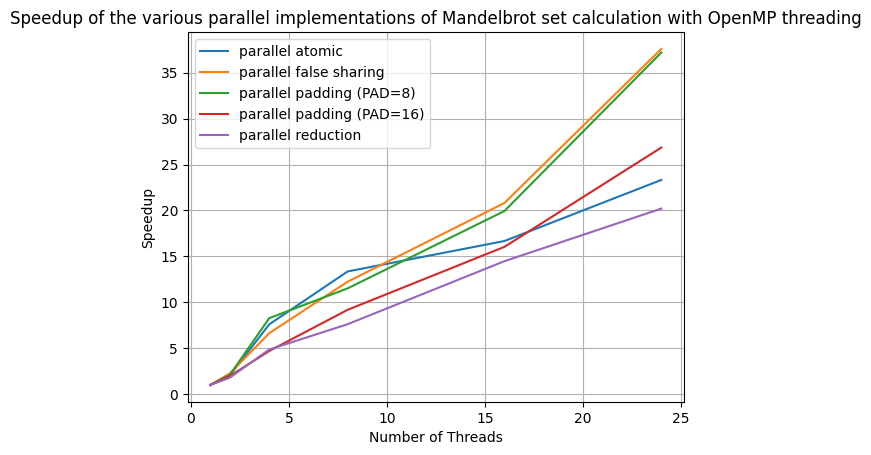

In [112]:
import matplotlib.pyplot as plt
threads = [1,2,4,8,16,24]
speedup_critical      = [serial_exec_time / x for x in critical_exec_time]
speedup_atomic        = [serial_exec_time / x for x in atomic_exec_time]
speedup_false_sharing = [serial_exec_time / x for x in false_sharing_exec_time]
speedup_padding08       = [serial_exec_time / x for x in padding08_exec_time]
speedup_padding16       = [serial_exec_time / x for x in padding16_exec_time]
speedup_reduction     = [serial_exec_time / x for x in reduction_exec_time]

# plt.plot(threads, speedup_critical, label = "parallel critical")
plt.plot(threads, speedup_atomic, label = "parallel atomic")
plt.plot(threads, speedup_false_sharing, label = "parallel false sharing")
plt.plot(threads, speedup_padding08, label = "parallel padding (PAD=8)")
plt.plot(threads, speedup_padding16, label = "parallel padding (PAD=16)")
plt.plot(threads, speedup_reduction, label = "parallel reduction")
  
# naming the x axis
plt.xlabel('Number of Threads')
# naming the y axis
plt.ylabel('Speedup')
# giving a title to my graph
plt.title('Speedup of the various parallel implementations of Mandelbrot set calculation with OpenMP threading')
plt.grid()
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

### Explain the results
Try to explain the results, by comparing the results of different implementations.

* For all implementations but the reduction implementation, we see linear speedup up to ~16 cores, and then super-linear speedup for thread count 24
* On the one hand, it makes sense, since the synchronization event is quite rare: assume at a given time all available threads are working on different complex numbers. each thread performs ~5000 iteration between trying to access the *numoutside variable, perhaps even more, because for numbers inside the Mandelbrot set, the if statments inside *testpoint is never satisfied.
* The super-linear speedup at 16 actually makes sense, since at #cores>12 we leave a single CPU, and gets more L3 & L2 cache resources. That plus the fact that each thread needs less memory  (smaller working set), leads to less cache conflicts and higher performance.
* Forthermore, I think the Mandelbrot task is relativly easy in the need to synchronize thread; There is no massage passing between threads, no mutual exclusion, etc. Therefore, the out-of-socket communication does not limit very much the progress of the program.
* On the other hand, I expected some bigger diffrences between the false sharing & the padding, for example.
    * I also checked, and each L1 cache line in Xeon 6128 Gold is 64 Bytes. Current compiler interprets *int as 4[B] word, so we have 16 words per eac cache line, not 8.<br>
    * To check this hypothesis, I created 2 versions of *mandel_parallel_padding.c: *_08pad & *_16pad.
    * Also here, the results are almost equal.
    * We hypothesized in class that the -O2 compiler optimization makes the padding technique not necessary.
    * So I run here everything with -O0.
    * As you can see, this was not the problem.

## Problem 4: nowait clause (10 points)
**The nowait clause is used to avoid the implied barrier at the end of a loop construct, when you have multiple independent loops within a parallel region.** \
For each following code snippet, we added OpenMP parallelization using the nowait clause to a given code section. 
We assume that a,b,y and z point to different pre-allocated arrays (each of size n). \
**For each code snippet, decide whether the parallel code is correct (always brings to the same result as in a serial execution), and explain your decision.**

In [ ]:
#include <math.h>
void nowait_example_1(int n, float *a, float *b, float *y, float *z)
{
    int i;
    #pragma omp parallel
    {
        #pragma omp for nowait
        for (i=0; i<n-1; i++)
            b[i] = (a[i] + a[i+1]) / 2.0;
            
        #pragma omp for nowait
        for (i=0; i<n; i++)
            y[i] = sqrt(z[i]);  
    }
}


In [ ]:
#include <math.h>
void nowait_example_2(int n, float *a, float *b, float *y, float *z)
{
    int i;
    #pragma omp parallel
    {
        #pragma omp for schedule(static) nowait
        for (i=0; i<n; i++)
            b[i] = a[i] / 2.0;
            
        #pragma omp for schedule(static) nowait
        for (i=0; i<n; i++)
            y[i] = sqrt(b[i]);  
    }
}

* This snippt is wrong because the 2nd loop uses the 1st loop results. Therefore, some threads might finish their work on the 1st loop, continue to the 2nd loop and read wrong values of b.<br>
* the schedule(static) clause makes the worksharing to happen at compile time (a.k.a 'static'), that means, deal-out blocks of iterations of size “chunk” to each thread.<br>
* However, there is no guarentees on which 'chunk' each thread gets. for example, thread t might get iteration [0, n/T-1] of the 1st for loop, but then iterations [n/T, 2*n/T-1] of the 2nd for loop.<br>
In such case, he might read outdated values of b, which is wrong. 

In [ ]:
#include <math.h>
void nowait_example_2(int n, float *a, float *b, float *y, float *z)
{
    int i;
    #pragma omp parallel
    {
        #pragma omp for schedule(dynamic, 8) nowait
        for (i=0; i<n; i++)
            b[i] = a[i] / 2.0;
            
        #pragma omp for schedule(dynamic,8) nowait
        for (i=0; i<n; i++)
            y[i] = sqrt(b[i]);  
    }
}

Simiar to the previous snippt, I think this one is wrong too.<br>
In contrast to schedule(static), here schedule(dynamic, \<chunk\>) deals out \<chunk\> of iterations per thread, and when the thread finishes his current chunk, he comes back to the schedule and claims another chunk of iterations.<br>
Similar to the static case, I think this one is wrong for the same reason: there is no guarentees on the policy of worksharing for the 2nd for loop.<br>
It might be the same policy and then each thread will get the same iterations indices in both loops, but it might be different. 

In [ ]:
#include <math.h>
void nowait_example_4(int n, float *a, float *b, float *y, float *z)
{
    int i;
    #pragma omp parallel
    {
        #pragma omp single nowait
        for (i=0; i<n; i++)
            b[i] = a[i] / 2.0;        
            
        #pragma omp single nowait
        for (i=0; i<n; i++)
            y[i] = sqrt(b[i]);  
    }
}

This snippet is ok, although highly non efficient...<br>
the single construct make the 1st loop to be executed by a single thread only. Therfore, the 1st nowait has no practical meaning, anyway the single thread have to finish all iterations before it can continue to the 2nd loop.

In [ ]:
#include <math.h>
void nowait_example_5(int n, float *a, float *b, float *y, float *z)
{
    int i;
    #pragma omp parallel
    {
        #pragma omp master nowait
        for (i=0; i<n; i++)
            b[i] = a[i] / 2.0;        
            
        #pragma omp master nowait
        for (i=0; i<n; i++)
            y[i] = sqrt(b[i]);  
    }
}

Similar to the previous snippet, this one is ok. The master construct makes both loops to be executed by the master thread, which is basically equivalent to regular serial code without OpenMP.

## Problem 5: Count Prime Numbers (30 points)
**The schedule clause is used to provide more control over how iterations of a worksharing-loop construct are scheduled onto the threads, usually to balance the workload across threads. It supports both static and dynamic scheduling.**

In [3]:
cd ../problem5

C:\Users\manorz\OneDrive - NVIDIA Corporation\Desktop\Shared-Memory Parallelism CPUs GPUs and in-between 236606\cs236606\HW1\HW1\problem5


The following serial code counts the amount of prime numbers up to a given limit, by checking for each integer whther it is prime or not.

In this problem you are required to add parallelization to the main loop of the problem, **using the reduction and schedule clauses**. \
The main focus in your solution will be on choosing the best schedule method (default, static, dynamic, etc) along with the optimized chunk size for a given CPU node on Intel DevCloud. 
#### Fill the following table with run times (in seconds) for each schedule you examine and for different numbers of threads. Then report what is the optimal schedule method you found and explain your observation. Fill free to add/edit lines in order to tune the parameters, finding the best option you can.

In [15]:
import os
import re
import sys
from pprint import pprint
import pandas as pd

df = pd.DataFrame({
    'schedule': ['default', 'static', 'static,4', 'dynamic,8', 'guided', 'static,8', 'guided,8'], 
    '1 threads': 7*[None],
    '2 threads': 7*[None],
    '4 threads': 7*[None],
    '8 threads': 7*[None],
    '16 threads': 7*[None],
    '24 threads': 7*[None]
})
df = df.set_index('schedule')

o_file = 'run_parallel_schedule.sh.o2070004'
print(f'Reading {o_file} ... ')
file = open(o_file, 'r')
for line in file:
    r_line = re.findall('^.*Number of prime numbers is (\d+) in (\d+).(\d+) sec, with (\d+) threads \((.*)\).*$', line)
    if r_line:
        r_line = r_line[0]
        threads_num = r_line[3]
        threads_num = f'{threads_num} threads'
        schedule = r_line[4].replace(' ', '')
        time = float(f'{r_line[1]}.{r_line[2]}')
        df[threads_num][schedule] = time
df

Reading run_parallel_schedule.sh.o2070004 ... 


,1 threads,2 threads,4 threads,8 threads,16 threads,24 threads
schedule,,,,,,
default,136.776707,85.910039,46.085028,23.794013,12.097293,8.508406
static,136.746688,85.914006,46.086205,23.793134,12.119104,8.462103
"static,4",136.818107,68.454512,34.270701,17.162989,9.062153,8.900563
"dynamic,8",136.801235,68.579838,34.2922,17.164987,8.884173,6.183885
guided,136.883272,68.440827,34.239273,17.139186,8.854256,6.112899
"static,8",136.857332,68.463357,34.242952,17.176854,9.073446,6.857887
"guided,8",136.807484,68.461612,34.23513,17.139708,8.845895,6.106248


In [23]:
best_thread_num = df.T.min()
best_thread_num

schedule
default      8.508406
static       8.462103
static,4     8.900563
dynamic,8    6.183885
guided       6.112899
static,8     6.857887
guided,8     6.106248
dtype: object

In [25]:
best_schedule = df.min()
best_schedule

1 threads     136.746688
2 threads      68.440827
4 threads       34.23513
8 threads      17.139186
16 threads      8.845895
24 threads      6.106248
dtype: object

Use _prime_parallel.c_ to edit your parallel implementation. The next cell will help you to execute every time you examine a new schedule option. When you finish, keep the file _prime_parallel.c_ with the optimal schedule you found and execute again. 

In [ ]:
! chmod 755 ../q; chmod 755 run_parallel_schedule.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_schedule.sh; else ./run_parallel_schedule.sh; fi

* The optimal scheduling method I've found is the **guided** scheduling (with the static with chunk size 8 is roughly equal) at 24 threads. 
* It somehow makes sense, because in guided scheduling we start with large chunk size and slowly decrease it based on the runtime of previous iterations. 
* It fits this algorithm because for each integer under examination, the inner loop get bigger & bigger (O(sqrt(num))), and therfore to maintain load balancing between the threads as the computation is advancing, the scheduler decrease the chunk size.

### Intel VTune
**Now you will get experienced with Intel VTune, to analyze the load balancing of your prime numbers program.** \
According to the table above, find one good scheduling method and one bad scheduling method. Use VTune to show the good/bad load balancing between all the threads for both executions respectively. \
Upload a printscreen of the threading information from VTune. Upload both images in the current directory (problem5) with the following names respectively: \
_vtune_good_load_balancing.png_ \
_vtune_bad_load_balancing.png_ \
You can use the _upload_ button in JupyterLab to easily upload the images. 
Then run both cells to show the images on the notebook.


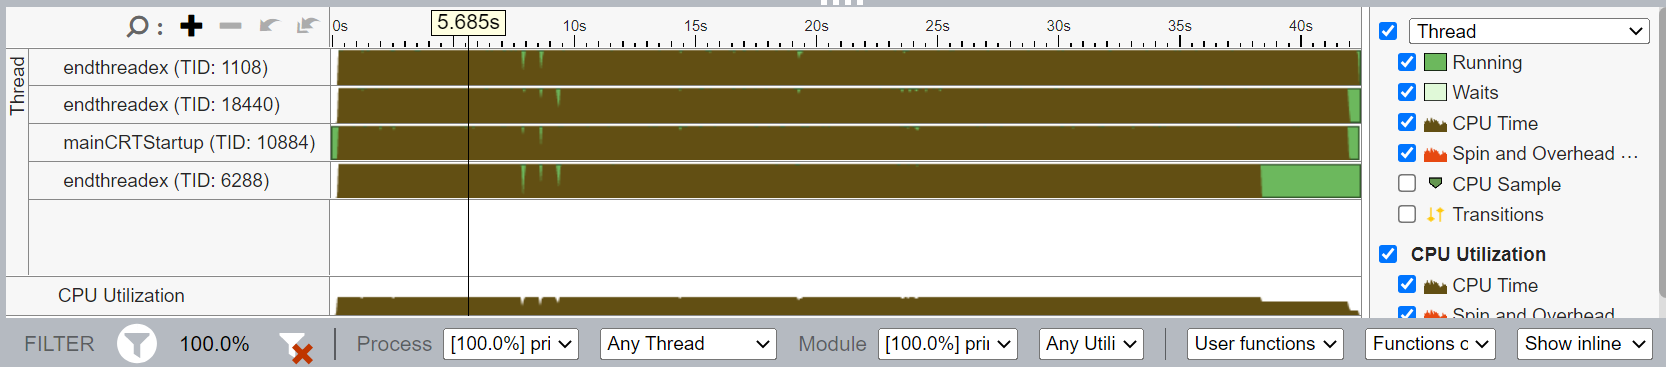

In [5]:
from IPython.display import Image
Image(filename='vtune_good_load_balancing.png') 

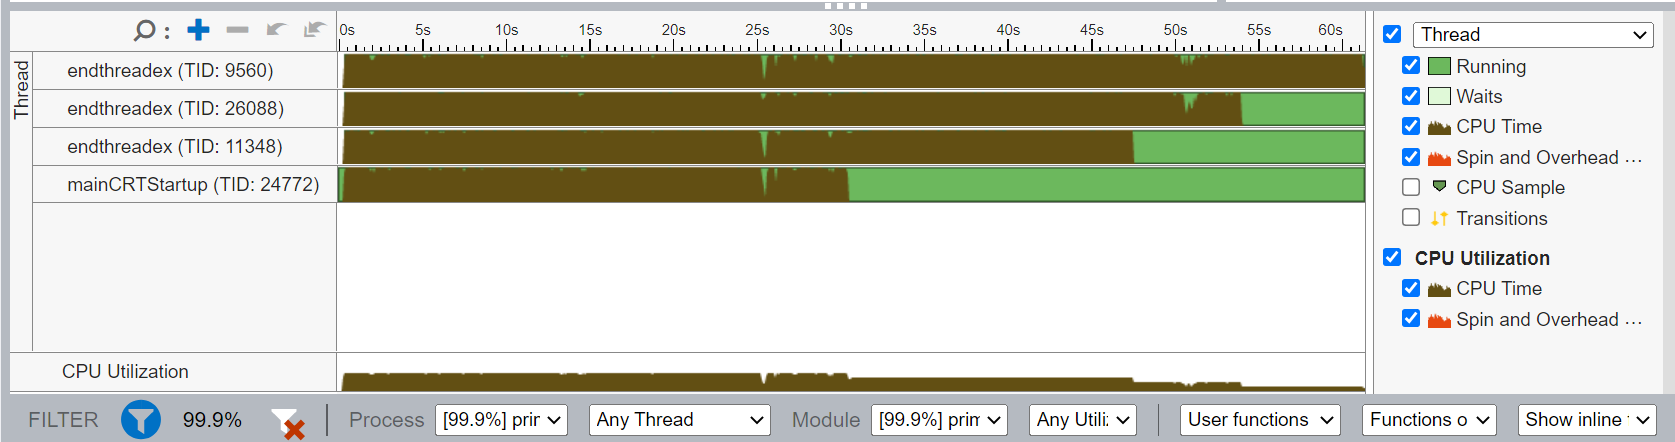

In [6]:
Image(filename='vtune_bad_load_balancing.png') 

I can't get VTune working using ssh. I always get ssh disconnected while (or shortly after) trying to startup the VTune server. So I run VTune localy on my laptop. Neither the VSCode Remote didn't work.

I choosed to compare the static 4 threads version and the static with chunk size 4 with 4 threads as well.

As expected, the chunk 4 version has better performance, since it has much better scheduling granularity. It especially importent in the later iterations, when each iteration takes much longer.

In terms of load balancing, we see that for the chunk 4 version, there is much smaller time periods, when only one thread is working.

To be honest, since I run it locally, and I don't have icx on windows (nor find out how to install it), I'm not sure these results are equivalent to what I run on DevCloud. נו שוין

